In [1]:
import pandas as pd
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import time
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import pickle
import os
from scipy.stats import shapiro
from difflib import get_close_matches
from IPython.display import IFrame, display

In [2]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fuzzywuzzy[speedup]

Note: you may need to restart the kernel to use updated packages.


In [4]:
from fuzzywuzzy import process
from IPython.display import display

In [5]:
!pip install thefuzz

In [6]:
audio_features_df = pd.read_csv(r"C:\Users\aican\2025-Ironhack\Unit10-2025-CW-25-26\Unit10-D1-2025-06-18\audio_features_dataset_curated.csv")
audio_features_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [7]:
audio_features_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,43000.000000,4.300000e+04,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,34.185953,2.308603e+05,0.575395,0.632784,5.346023,-7.915923,0.645512,0.071418,0.299402,0.118132,0.196259,0.482026,121.216687,3.910814
std,25.826649,9.285463e+04,0.166243,0.241942,3.559531,4.712412,0.478364,0.072019,0.322864,0.276817,0.172004,0.251098,29.360603,0.392699
min,0.000000,0.000000e+00,0.000000,0.000020,0.000000,-43.043000,0.000000,0.000000,0.000001,0.000000,0.009860,0.000000,0.000000,0.000000
25%,1.000000,1.811060e+05,0.465000,0.475000,2.000000,-9.400000,0.000000,0.034300,0.022000,0.000000,0.096200,0.275000,97.937000,4.000000
50%,39.000000,2.168035e+05,0.587000,0.674000,6.000000,-6.749000,1.000000,0.045500,0.155000,0.000016,0.125000,0.472000,121.390500,4.000000
75%,54.000000,2.613592e+05,0.700000,0.832000,8.000000,-4.942000,1.000000,0.073700,0.546000,0.006942,0.242000,0.684000,139.950000,4.000000
max,100.000000,3.601693e+06,0.975000,1.000000,11.000000,1.821000,1.000000,0.924000,0.996000,1.000000,0.994000,0.995000,243.372000,5.000000


In [8]:
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          43000 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        43000 non-null  int64  
 5   duration_ms       43000 non-null  int64  
 6   explicit          43000 non-null  bool   
 7   danceability      43000 non-null  float64
 8   energy            43000 non-null  float64
 9   key               43000 non-null  int64  
 10  loudness          43000 non-null  float64
 11  mode              43000 non-null  int64  
 12  speechiness       43000 non-null  float64
 13  acousticness      43000 non-null  float64
 14  instrumentalness  43000 non-null  float64
 15  liveness          43000 non-null  float64
 16  valence           43000 non-null  float6

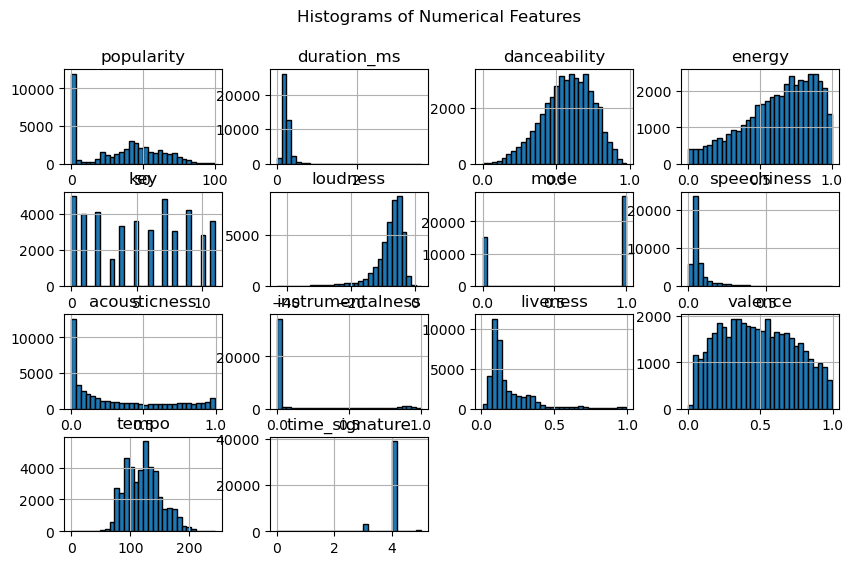

In [9]:
# Histogram for numerical columns
audio_features_df.hist(figsize=(10, 6), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [10]:
for column in audio_features_df.select_dtypes(include=['number']).columns:
    stat, p = shapiro(audio_features_df[column])
    print(f"{column}: p-value = {p}")

popularity: p-value = 7.387422427277042e-91
duration_ms: p-value = 1.8222715802425305e-118
danceability: p-value = 1.0128689599369901e-48
energy: p-value = 5.956544760668996e-77
key: p-value = 8.877043840756114e-85
loudness: p-value = 9.292417268906953e-110
mode: p-value = 1.3261643918686322e-130
speechiness: p-value = 1.3033892029608848e-131
acousticness: p-value = 3.3580343633350725e-107
instrumentalness: p-value = 3.015446752397074e-139
liveness: p-value = 6.191833430686239e-121
valence: p-value = 1.7955313744907134e-65
tempo: p-value = 4.0759371434506857e-53
time_signature: p-value = 7.78678932873206e-146


C:\Users\aican\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 43000.
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
# Based on the p-values from the Shapiro-Wilk test, none of the features in audio_features_df follow a normal distribution.
# The p-value in all features is < 0.05, so we reject the null hypothesis, meaning the data is not normally distributed.

In [12]:
audio_features_df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [13]:
rows_with_nulls = audio_features_df[audio_features_df.isnull().any(axis=1)]

rows_with_nulls

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
24900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4


In [14]:
# Identify rows with nulls
rows_with_nulls = audio_features_df[audio_features_df.isnull().any(axis=1)]

# Extract track IDs
track_ids_with_nulls = rows_with_nulls["track_id"]

track_ids_with_nulls

24900    1kR4gIb7nGxHPI3D2ifs59
Name: track_id, dtype: object

In [15]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [16]:
def get_track_info(track_id):
    track = sp.track(track_id)
    artist = track["artists"][0]["name"]
    album = track["album"]["name"]
    track_name = track["name"]
    
    return artist, album, track_name

In [17]:
track_id = "1kR4gIb7nGxHPI3D2ifs59"
artist, album, track_name = get_track_info(track_id)

print(f"Artist: {artist}")
print(f"Album: {album}")
print(f"Track Name: {track_name}")

Artist: 
Album: 
Track Name: 


In [18]:
audio_features_df = audio_features_df[audio_features_df["track_id"] != "1kR4gIb7nGxHPI3D2ifs59"]

In [19]:
audio_features_df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [20]:
# Drop duplicates with the same track_id, we keep the first row. Identical combinations of artist name & track name are not considered duplicates.
audio_features_df = audio_features_df.drop_duplicates(subset=['track_id'], keep='first')

audio_features_df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [21]:
url = "https://raw.githubusercontent.com/aicanizares/gnod-project/refs/heads/main/billboard_songs_and_artists.csv"
billboard_df = pd.read_csv(url)

In [22]:
billboard_df.head(5)

,Song,Artist
0,Manchild,Sabrina Carpenter
1,Ordinary,Alex Warren
2,What I Want,Morgan Wallen Featuring Tate McRae
3,Just In Case,Morgan Wallen
4,Luther,Kendrick Lamar & SZA


In [23]:
billboard_df.columns = billboard_df.columns.str.lower()

In [24]:
# Get the track_id of the Billboard Hot 100 df.

In [25]:
def get_track_id(song, artist):
    try:
        query = f'track:{song} artist:{artist}'
        result = sp.search(q=query, type='track', limit=1)
        tracks = result.get('tracks', {}).get('items', [])
        time.sleep(0.5)  # Rate limiting: pause to avoid hitting API limits
        if tracks:
            return tracks[0]['id']
        else:
            return None
    except Exception as e:
        print(f"Error fetching track_id for '{song}' by '{artist}': {e}")
        return None

In [26]:
billboard_df['track_id'] = billboard_df.apply(
    lambda row: get_track_id(row['song'], row['artist']), axis=1
)

In [27]:
billboard_df.head(5)

,song,artist,track_id
0,Manchild,Sabrina Carpenter,42UBPzRMh5yyz0EDPr6fr1
1,Ordinary,Alex Warren,6qqrTXSdwiJaq8SO0X2lSe
2,What I Want,Morgan Wallen Featuring Tate McRae,None
3,Just In Case,Morgan Wallen,02Ya2Q08bBKFqUJvjmyRXK
4,Luther,Kendrick Lamar & SZA,2CGNAOSuO1MEFCbBRgUzjd


In [28]:
# Count the number of unique track_ids
unique_track_ids = billboard_df['track_id'].nunique()

In [29]:
unique_track_ids

91

In [30]:
billboard_df.shape

(100, 3)

In [31]:
billboard_df.head(5)

,song,artist,track_id
0,Manchild,Sabrina Carpenter,42UBPzRMh5yyz0EDPr6fr1
1,Ordinary,Alex Warren,6qqrTXSdwiJaq8SO0X2lSe
2,What I Want,Morgan Wallen Featuring Tate McRae,None
3,Just In Case,Morgan Wallen,02Ya2Q08bBKFqUJvjmyRXK
4,Luther,Kendrick Lamar & SZA,2CGNAOSuO1MEFCbBRgUzjd


In [32]:
billboard_df.isnull().sum()

song        0
artist      0
track_id    9
dtype: int64

In [33]:
# Drop rows where 'rack_id'is NaN
billboard_df = billboard_df.dropna(subset=['track_id'])

In [34]:
billboard_df.isnull().sum()

song        0
artist      0
track_id    0
dtype: int64

In [35]:
billboard_df.shape

(91, 3)

In [36]:
# Prework data cleaning in dfs.

# audio_features_df from Spotify: 
# 1. Removing outliers is also a hint, because they can affect the clusters.
# 2. Also remove duplicates.
# 3 Scale with MinMaxScaler.

# billboard_df from Billboard Top 100: 
# 1. Add the track ID of the songs in the Billboard top 100. In another column.

In [37]:
# Song recommender:

# 0. Asking the user for an input and playing the song. 
# 1. Look for the best k (KMeans models, number of clusters). Look at the elbow method, silhouette score. Test the candidates out, e.g. 8. We can have a couple of candidates, number of clusters. Choose it. If we use the loop, have it pickled.
# 2. Clustering: Add a new column "cluster" that stores the cluster of each song.
# 3. Start exploring the clusters (statistics of each cluster, listen to songs). Group by cluster and get the averages of the features, e. g. average tempo. That can help to name the clusters.
# 4. Label the clusters. Eg. high enegy, music for an autumn afternoon, relaxing. Include the labels in the question input.
# 5. Add the cluster names to the Python program (input). We will take into account typos (upper / lower case, fuzzy matching).
# 6. User chooses a genre, and they get recommended a song from that cluster. If they enter popular, I recommend them a random Billboard song. I play it for them.

In [38]:
# Function to recommend a song only from Billboard 100, not yet from audio_features_df. This function searches for the track_id on Spotify, not within the billboard_df.

In [39]:
def recommend_song(user_input, billboard_df, sp):
    if user_input == "popular":
        song = billboard_df["song"].sample().iloc[0]
        results = sp.search(q=song, limit=1)
        if results["tracks"]["items"]:
            song_id = results["tracks"]["items"][0]["id"]
            return play_song(song_id)
        else:
            return "Sorry, couldn't find the song on Spotify."
    else:
        return "Work in progress, we will recommend you a customized song for your taste very soon!"

In [40]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

###### user_input = input("Write your song preference to get a recommendation. You can choose between: popular (0), rock (1) or pop (2).")
display(recommend_song(user_input, billboard_df, sp))
print("Here's your recommended song, enjoy!")

In [42]:
# The following graph is a test.

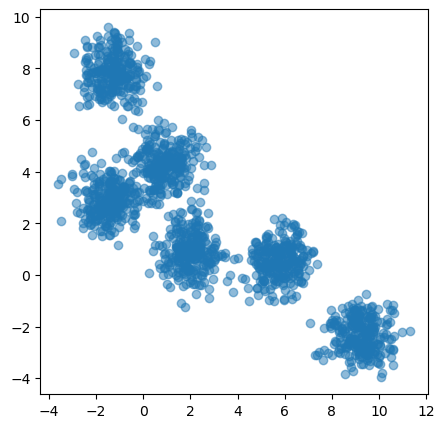

In [43]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D


n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=6, cluster_std=0.7, n_features=2, random_state=0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1],alpha=0.5,)
plt.show()

In [44]:
audio_features_df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [45]:
unique_values_explicit = audio_features_df['explicit'].unique()

In [46]:
unique_values_explicit

array([False,  True])

In [47]:
audio_features_df['explicit'] = audio_features_df['explicit'].astype(int)

In [48]:
explicit_counts = audio_features_df['explicit'].value_counts()

In [49]:
explicit_counts

explicit
0    32141
1     2336
Name: count, dtype: int64

In [50]:
numerical_audio_features_df = audio_features_df.select_dtypes(include="number")

In [51]:
unique_popularity = numerical_audio_features_df["popularity"].drop_duplicates().sort_values(ascending=False)
print(unique_popularity)

9001     100
19664     99
9008      98
25358     97
9000      96
        ... 
2013       4
1099       3
2014       2
25         1
23         0
Name: popularity, Length: 101, dtype: int64


In [52]:
numerical_audio_features_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [53]:
# Drop the popularity column, because it is not relevant as a numerical value, it is ordinal. Also explicit is irrelevant.
numerical_audio_features_df = numerical_audio_features_df.drop(columns=['popularity', 'explicit'])

In [54]:
numerical_audio_features_df.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [55]:
# Scaling

In [56]:
minmax = MinMaxScaler()

In [57]:
minmax.fit(numerical_audio_features_df)
X_scaled = minmax.transform(numerical_audio_features_df)

In [58]:
# Create K-Means Model
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_scaled)

C:\Users\aican\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aican\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aican\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aican\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aican\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

KMeans(n_clusters=6)

In [59]:
kmeans.labels_

array([1, 5, 2, ..., 3, 0, 3])

In [60]:
kmeans.predict(X_scaled)

array([1, 5, 2, ..., 3, 0, 3])

In [61]:
audio_features_df["cluster"] = kmeans.labels_

In [62]:
audio_features_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,5
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,2
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,5
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,4
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,3
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,3
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,0


In [63]:
unique_clusters_total = audio_features_df["cluster"].unique()

In [64]:
unique_clusters_total

array([1, 5, 2, 0, 3, 4])

In [65]:
audio_features_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'cluster'],
      dtype='object')

In [66]:
numerical_audio_features_df.sample()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
16238,194853,0.215,0.927,9,-7.327,1,0.0452,0.000273,0.00661,0.126,0.49,170.814,4


In [67]:
input_cluster = int(input("please enter an audio features cluster"))

please enter an audio features cluster 3


In [68]:
filtered_audio_features_cluster = audio_features_df.loc[audio_features_df["cluster"]==input_cluster]

In [69]:
filtered_audio_features_cluster

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
12,4ptDJbJl35d7gQfeNteBwp,Dan Berk,Solo,Solo,52,198712,0,0.489,0.3140,7,-9.245,0,0.0331,0.749,0.000000,0.1130,0.6070,124.234,4,3
17,4Yo0igmcoNyat1secaH0OD,Andrew Foy;Renee Foy,At My Worst,At My Worst,54,169728,0,0.795,0.0841,10,-18.090,0,0.0461,0.742,0.000012,0.0853,0.6090,91.803,4,3
25,6D33wCKzWtNEgOovgeVJ7r,Jason Mraz,Mellow Adult Pop,Bella Luna,1,302346,0,0.755,0.4540,9,-9.609,0,0.0352,0.757,0.000000,0.2360,0.3300,120.060,4,3
36,62EwQLDw0dprDzuLwQ0sH1,KT Tunstall,Chill Christmas Dinner,Lonely This Christmas,0,257493,0,0.409,0.1530,6,-10.740,0,0.0306,0.939,0.000026,0.1080,0.1800,85.262,4,3
39,0adVktNVJXPZfhQe6B1NO5,KT Tunstall,sadsadchristmas,Lonely This Christmas,0,257493,0,0.409,0.1530,6,-10.740,0,0.0306,0.939,0.000026,0.1080,0.1800,85.262,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42956,2eEdlQTF6qJCXC5f8MFnu7,Hillsong Young & Free,lll (Studio Sessions),P E A C E - Acoustic,41,263893,0,0.380,0.2650,9,-10.763,0,0.0302,0.669,0.000002,0.1200,0.1060,127.692,3,3
42979,5wMkhfu3oYYmFimOGzeFt2,Fondo de la lectura,Concentración: Sonidos de la Lluvia,"Concentración: Sonidos de la Lluvia, Pt. 01",22,143403,0,0.417,0.9670,5,-27.146,0,0.0503,0.924,0.958000,0.6960,0.0147,65.002,4,3
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.994,0.976000,0.1050,0.0350,85.239,4,3
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.867,0.000000,0.0839,0.7430,132.378,4,3


In [70]:
unique_clusters_filtered = filtered_audio_features_cluster["cluster"].unique()

In [71]:
unique_clusters_filtered

array([3])

In [72]:
unique_clusters_total

array([1, 5, 2, 0, 3, 4])

In [73]:
unique_clusters_total = sorted(unique_clusters_total)

In [74]:
# Define the dictionary to store DataFrames. Each key in the dictionary is a df filtered by the cluster value.
cluster_dfs = {}

# Loop through each unique cluster and filter the DataFrame
for cluster in range(6):
    cluster_dfs[f'cluster_{cluster}'] = audio_features_df[audio_features_df['cluster'] == cluster]

In [75]:
cluster_0_df = cluster_dfs['cluster_0']

In [76]:
# Drop irrelevant columns
cluster_0_df = cluster_0_df.drop(columns=['popularity', 'explicit'])

In [77]:
cluster_0_df.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,8.397000e+03,8397.000000,8397.000000,8397.000000,8397.000000,8397.0,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.0
mean,2.351522e+05,0.589054,0.737212,7.974038,-6.235060,1.0,0.074473,0.139678,0.066380,0.208450,0.529235,126.103583,3.952840,0.0
std,8.564737e+04,0.152311,0.160634,1.810270,2.416421,0.0,0.074126,0.170932,0.201197,0.185743,0.244108,28.782531,0.270277,0.0
min,3.047400e+04,0.086700,0.160000,5.000000,-21.444000,1.0,0.022300,0.000001,0.000000,0.009860,0.012000,48.718000,0.000000,0.0
25%,1.871460e+05,0.485000,0.620000,7.000000,-7.572000,1.0,0.034300,0.009690,0.000000,0.094200,0.334000,103.352000,4.000000,0.0
50%,2.204930e+05,0.598000,0.750000,8.000000,-5.881000,1.0,0.047700,0.064100,0.000006,0.132000,0.531000,125.770000,4.000000,0.0
75%,2.636660e+05,0.702000,0.873000,9.000000,-4.532000,1.0,0.080800,0.220000,0.001200,0.266000,0.722000,144.018000,4.000000,0.0
max,2.959346e+06,0.967000,1.000000,11.000000,0.681000,1.0,0.889000,0.881000,0.972000,0.994000,0.994000,220.081000,5.000000,0.0


In [78]:
def remove_outliers_tukey(df):
    # Loop through all numerical columns
    for column in df.select_dtypes(include=['number']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out rows that are outside the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [79]:
# Apply the function to df
cluster_0_df_no_outliers = remove_outliers_tukey(cluster_0_df)

In [80]:
cluster_0_df_no_outliers.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.0,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.0,4639.0
mean,221620.199181,0.590047,0.735901,7.930588,-5.773844,1.0,0.055062,0.122310,0.000110,0.169197,0.550119,124.306777,4.0,0.0
std,49271.062354,0.140341,0.152662,1.810661,2.037423,0.0,0.029560,0.133337,0.000306,0.106688,0.229264,28.432942,0.0,0.0
min,73226.000000,0.180000,0.260000,5.000000,-11.886000,1.0,0.022300,0.000001,0.000000,0.009860,0.037800,51.037000,4.0,0.0
25%,187669.500000,0.495000,0.621500,7.000000,-7.005500,1.0,0.032800,0.014200,0.000000,0.092200,0.365000,100.443500,4.0,0.0
50%,216520.000000,0.594000,0.749000,8.000000,-5.548000,1.0,0.044300,0.067400,0.000000,0.126000,0.554000,124.001000,4.0,0.0
75%,252106.000000,0.693000,0.864000,9.000000,-4.347000,1.0,0.067800,0.191000,0.000029,0.231000,0.732000,143.090500,4.0,0.0
max,378313.000000,0.959000,1.000000,11.000000,-0.108000,1.0,0.154000,0.503000,0.002130,0.528000,0.994000,206.000000,4.0,0.0


In [81]:
cluster_1_df = cluster_dfs['cluster_1']

In [82]:
# Apply the function to df
cluster_1_df_no_outliers = remove_outliers_tukey(cluster_1_df)

In [83]:
# Drop irrelevant columns
cluster_1_df = cluster_1_df.drop(columns=['popularity', 'explicit'])

In [84]:
cluster_1_df_no_outliers.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,4626.000000,4626.000000,4626.0,4626.000000,4626.000000,4626.000000,4626.000000,4626.0,4626.000000,4626.000000,4626.000000,4626.000000,4626.000000,4626.000000,4626.0,4626.0
mean,39.026805,221556.750108,0.0,0.619878,0.761199,5.851492,-5.608783,0.0,0.060338,0.111256,0.000868,0.170513,0.553432,122.151717,4.0,1.0
std,25.950117,47966.922415,0.0,0.139982,0.142266,3.548977,2.045712,0.0,0.030616,0.126461,0.002400,0.107675,0.229153,25.887535,0.0,0.0
min,0.000000,83040.000000,0.0,0.206000,0.305000,0.000000,-12.058000,0.0,0.023200,0.000003,0.000000,0.014400,0.036800,48.578000,4.0,1.0
25%,19.000000,187978.250000,0.0,0.524000,0.667000,3.000000,-6.908000,0.0,0.037200,0.009340,0.000000,0.090600,0.377000,101.029500,4.0,1.0
50%,43.000000,215214.000000,0.0,0.631000,0.778000,6.000000,-5.348000,0.0,0.050500,0.058550,0.000004,0.128500,0.550000,121.268000,4.0,1.0
75%,60.000000,248768.000000,0.0,0.723000,0.876000,9.000000,-4.108500,0.0,0.074875,0.178000,0.000192,0.237750,0.740000,138.002250,4.0,1.0
max,96.000000,373898.000000,0.0,0.975000,0.999000,11.000000,-0.079000,0.0,0.164000,0.477000,0.015000,0.538000,0.985000,195.646000,4.0,1.0


In [85]:
cluster_2_df = cluster_dfs['cluster_2']

In [86]:
# Apply the function to df
cluster_2_df_no_outliers = remove_outliers_tukey(cluster_2_df)

In [87]:
# Drop irrelevant columns
cluster_2_df = cluster_2_df.drop(columns=['popularity', 'explicit'])

In [88]:
cluster_2_df_no_outliers.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,3366.000000,3366.000000,3366.0,3366.000000,3366.000000,3366.000000,3366.000000,3366.0,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.0,3366.0
mean,36.432561,224972.937314,0.0,0.582594,0.737540,1.398396,-5.880614,1.0,0.047914,0.135635,0.000182,0.173914,0.545756,123.880573,4.0,2.0
std,25.452646,50182.776338,0.0,0.133232,0.149835,1.351544,2.087777,0.0,0.021053,0.147402,0.000540,0.110671,0.234796,27.199098,0.0,0.0
min,0.000000,74410.000000,0.0,0.186000,0.276000,0.000000,-12.420000,1.0,0.022100,0.000003,0.000000,0.015000,0.037200,57.024000,4.0,2.0
25%,3.000000,190106.000000,0.0,0.493000,0.630250,0.000000,-7.035500,1.0,0.032200,0.013300,0.000000,0.092700,0.352000,102.027000,4.0,2.0
50%,40.000000,219591.500000,0.0,0.578000,0.749000,1.000000,-5.618000,1.0,0.041000,0.073100,0.000000,0.126000,0.541000,124.009000,4.0,2.0
75%,56.000000,254382.750000,0.0,0.682000,0.860000,2.000000,-4.328000,1.0,0.057275,0.220000,0.000035,0.240000,0.742000,142.842000,4.0,2.0
max,100.000000,383634.000000,0.0,0.965000,0.999000,4.000000,-0.717000,1.0,0.120000,0.543000,0.003660,0.555000,0.981000,204.643000,4.0,2.0


In [89]:
cluster_3_df = cluster_dfs['cluster_3']

In [90]:
# Apply the function to df
cluster_3_df_no_outliers = remove_outliers_tukey(cluster_3_df)

In [91]:
# Drop irrelevant columns
cluster_3_df = cluster_3_df.drop(columns=['popularity', 'explicit'])

In [92]:
cluster_3_df_no_outliers.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,1302.000000,1302.000000,1302.0,1302.000000,1302.000000,1302.000000,1302.000000,1302.0,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.0,1302.0
mean,37.181260,209405.781874,0.0,0.524884,0.345248,5.412442,-12.390761,0.0,0.041660,0.722432,0.399375,0.117359,0.292654,110.477922,4.0,3.0
std,21.148558,74769.237780,0.0,0.174117,0.167583,3.460718,4.997642,0.0,0.012760,0.218889,0.419947,0.034316,0.187816,29.473540,0.0,0.0
min,0.000000,31106.000000,0.0,0.063300,0.007560,0.000000,-27.178000,0.0,0.023500,0.109000,0.000000,0.038700,0.026600,30.322000,4.0,3.0
25%,22.250000,152233.250000,0.0,0.409500,0.217000,2.000000,-14.731000,0.0,0.032100,0.594000,0.000013,0.096500,0.142000,85.450750,4.0,3.0
50%,41.000000,203682.000000,0.0,0.541000,0.344500,5.000000,-11.075500,0.0,0.037900,0.777500,0.122500,0.110000,0.252500,108.314000,4.0,3.0
75%,53.000000,257348.250000,0.0,0.657750,0.462000,9.000000,-8.676500,0.0,0.047675,0.895000,0.874000,0.131000,0.421000,130.072000,4.0,3.0
max,90.000000,417733.000000,0.0,0.883000,0.844000,11.000000,-3.726000,0.0,0.084400,0.995000,0.982000,0.234000,0.793000,204.036000,4.0,3.0


In [93]:
cluster_4_df = cluster_dfs['cluster_4']

In [94]:
# Apply the function to df
cluster_4_df_no_outliers = remove_outliers_tukey(cluster_4_df)

In [95]:
# Drop irrelevant columns
cluster_4_df = cluster_4_df.drop(columns=['popularity', 'explicit'])

In [96]:
cluster_4_df_no_outliers.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,754.000000,754.000000,754.0,754.000000,754.000000,754.000000,754.000000,754.0,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.0,754.0
mean,30.818302,191456.216180,0.0,0.445746,0.216863,4.916446,-18.916028,1.0,0.043424,0.850623,0.886122,0.107965,0.243521,104.249707,4.0,4.0
std,21.838296,93153.378027,0.0,0.192976,0.178841,3.457912,7.444731,0.0,0.011766,0.189320,0.064859,0.023438,0.193279,29.789876,0.0,0.0
min,0.000000,23506.000000,0.0,0.062600,0.001440,0.000000,-39.869000,1.0,0.024000,0.286000,0.676000,0.048500,0.028600,47.370000,4.0,4.0
25%,8.000000,128125.750000,0.0,0.299250,0.068000,2.000000,-24.118750,1.0,0.034725,0.784000,0.856250,0.093750,0.079825,79.985250,4.0,4.0
50%,33.000000,170075.500000,0.0,0.445500,0.172500,5.000000,-18.225500,1.0,0.040450,0.940000,0.903000,0.108000,0.183000,97.518000,4.0,4.0
75%,50.000000,240739.250000,0.0,0.602000,0.335250,8.000000,-13.069250,1.0,0.049600,0.987000,0.933000,0.119000,0.353500,126.339750,4.0,4.0
max,79.000000,473493.000000,0.0,0.879000,0.845000,11.000000,-4.139000,1.0,0.082200,0.996000,0.986000,0.183000,0.804000,195.202000,4.0,4.0


In [97]:
cluster_5_df = cluster_dfs['cluster_5']

In [98]:
# Apply the function to df
cluster_5_df_no_outliers = remove_outliers_tukey(cluster_5_df)

In [99]:
# Drop irrelevant columns
cluster_5_df = cluster_5_df.drop(columns=['popularity', 'explicit'])

In [100]:
cluster_5_df_no_outliers.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
count,2449.000000,2449.000000,2449.0,2449.000000,2449.000000,2449.000000,2449.000000,2449.0,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.0,2449.0
mean,34.915067,224834.160882,0.0,0.518573,0.366688,4.865251,-9.702196,1.0,0.035751,0.722930,0.000032,0.129041,0.362969,113.800799,4.0,5.0
std,24.508371,57646.768819,0.0,0.134213,0.138179,3.399318,3.025726,0.0,0.008484,0.154204,0.000084,0.051888,0.189035,27.902575,0.0,0.0
min,0.000000,60333.000000,0.0,0.090600,0.024200,0.000000,-19.425000,1.0,0.023000,0.290000,0.000000,0.029500,0.035200,51.414000,4.0,5.0
25%,1.000000,182553.000000,0.0,0.429000,0.266000,2.000000,-11.717000,1.0,0.029700,0.617000,0.000000,0.098900,0.215000,90.025000,4.0,5.0
50%,42.000000,222146.000000,0.0,0.534000,0.371000,5.000000,-9.243000,1.0,0.033100,0.744000,0.000000,0.113000,0.328000,115.877000,4.0,5.0
75%,53.000000,262896.000000,0.0,0.610000,0.471000,8.000000,-7.496000,1.0,0.039500,0.845000,0.000010,0.144000,0.477000,134.027000,4.0,5.0
max,88.000000,393813.000000,0.0,0.898000,0.776000,11.000000,-2.330000,1.0,0.061900,0.991000,0.000560,0.293000,0.872000,203.989000,4.0,5.0


In [101]:
# Define a mapping of cluster numbers to cluster names
cluster_names = {
    0: "Melancholic Acoustic Instrumentals",
    1: "Energetic Pop Anthems",
    2: "Epic Cinematic Instrumentals",
    3: "Indie Acoustic / Folk",
    4: "Feel-Good Pop Rock",
    5: "Upbeat Pop & Dance"}

In [102]:
# Map the cluster numbers to cluster names and create a new column
audio_features_df['cluster_name'] = audio_features_df['cluster'].map(cluster_names)

In [103]:
audio_features_df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,cluster_name
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,1,Energetic Pop Anthems
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,5,Upbeat Pop & Dance
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,2,Epic Cinematic Instrumentals
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,5,Upbeat Pop & Dance
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,5,Upbeat Pop & Dance


In [104]:
# Count the number of rows in each cluster
cluster_counts = audio_features_df['cluster'].value_counts()

In [105]:
cluster_counts

cluster
1    9432
0    8397
2    6618
5    5509
3    2670
4    1851
Name: count, dtype: int64

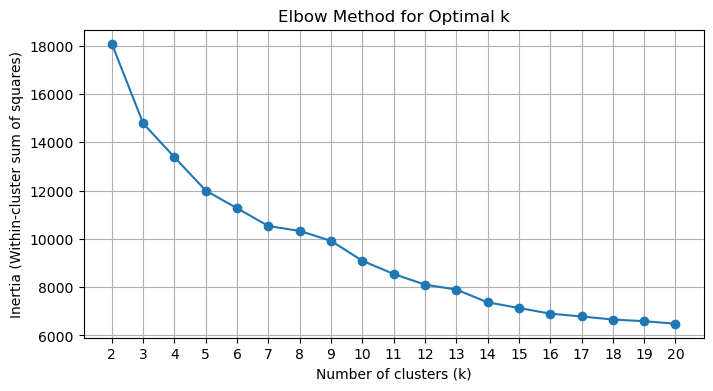

In [106]:
inertias = []
k_range = range(2, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)

In [107]:
# Number of chosen clusters according to the elbow method: 6
# After k = 5, the inertia continues to decrease, but the drop becomes less significant after 6 clusters. The curve flattens more noticeably beyond 6.

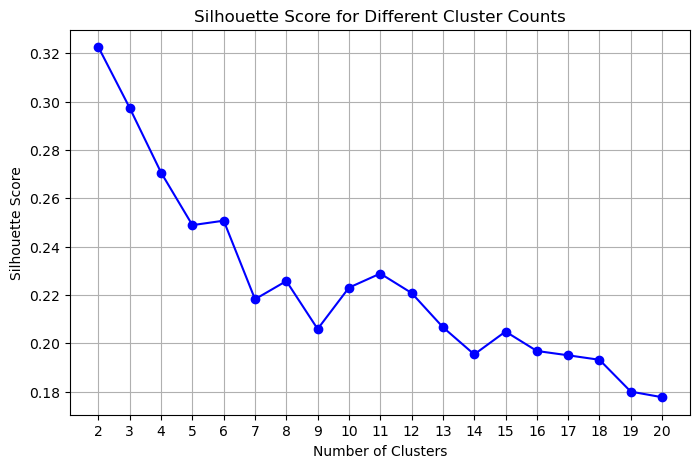

In [108]:
cluster_range = range(2, 21)
silhouette_scores = []

os.makedirs("pickles", exist_ok=True)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 5)
    cluster_labels = kmeans.fit_predict(X_scaled)
    #pickling
    filename = "pickles/kmeans_" + str(n_clusters) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
        
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [109]:
# Silhouette score: The highest silhouette with a minimum of 5 clusters is k = 6, as it has the highest silhouette score compared to other values.
# Since the conclusion of the elbow method was also 6 clusters, we will use 6 clusters.

In [110]:
# Cluster names and numbers
#    0: "Melancholic Acoustic Instrumentals",
#    1: "Energetic Pop Anthems",
#    2: "Epic Cinematic Instrumentals",
#    3: "Indie Acoustic / Folk",
#    4: "Feel-Good Pop Rock",
#    5: "Upbeat Pop & Dance"}
# 6: "Popular"

In [111]:
# Play a Spotify track
def play_song(track_id):
    return IFrame(
        src="https://open.spotify.com/embed/track/" + track_id,
        width="320",
        height="80",
        frameborder="0",
        allowtransparency="true",
        allow="encrypted-media", )

In [112]:
# Recommend a song
def recommend_song(user_input, audio_features_df, billboard_df):

    cluster_names = {
        0: "Melancholic Acoustic Instrumentals",
        1: "Energetic Pop Anthems",
        2: "Epic Cinematic Instrumentals",
        3: "Indie Acoustic / Folk",
        4: "Feel-Good Pop Rock",
        5: "Upbeat Pop & Dance",
        6: "Popular"}

    # Create lowercase name
    name_to_cluster = {v.lower(): k for k, v in cluster_names.items()}
    valid_names = list(name_to_cluster.keys())
    user_input_cleaned = user_input.strip().lower()

    # Fuzzy match
    close_matches = get_close_matches(user_input_cleaned, valid_names, n=1, cutoff=0.6)

    if not close_matches:
        return "Sorry, your input didn't math any available song type. Please check for typos and try again."

    matched_name = close_matches[0]
    cluster_num = name_to_cluster[matched_name]

    # Recommend a song for the input cluster
    if cluster_num in range(0, 7):
        cluster_songs = audio_features_df[audio_features_df['cluster'] == cluster_num]
        if cluster_songs.empty:
            return f"No songs found for '{cluster_names[cluster_num]}'."
        track_id = random.choice(cluster_songs["track_id"].tolist())
        return play_song(track_id)
    elif cluster_num == 7:
        track_id = random.choice(billboard_df["track_id"].tolist())
        return play_song(track_id)

In [113]:
# Input with cluster names
user_input = input(
    "Write your preferred song type to get a recommendation. You can choose between: \n"
    "- Melancholic Acoustic Instrumentals\n"
    "- Energetic Pop Anthems\n"
    "- Epic Cinematic Instrumentals\n"
    "- Indie Acoustic / Folk\n"
    "- Chill Pop\n"
    "- Feel-Good Pop Rock\n"
    "- Upbeat Pop & Dance\n"
    "- Popular\n"
)

display(recommend_song(user_input, audio_features_df, billboard_df))
print("Here's your recommended song, enjoy!")

Write your preferred song type to get a recommendation. You can choose between: 
- Melancholic Acoustic Instrumentals
- Energetic Pop Anthems
- Epic Cinematic Instrumentals
- Indie Acoustic / Folk
- Chill Pop
- Feel-Good Pop Rock
- Upbeat Pop & Dance
- Popular
 CHILL POP


"Sorry, your input didn't math any available song type. Please check for typos and try again."

Here's your recommended song, enjoy!


In [114]:
# Check if the track_id of the recommended song really belongs to the input cluster.
track_id = "6npUdmcsfp9yRa65tF0PUH"
track_cluster = audio_features_df[audio_features_df['track_id'] == track_id]['cluster']

# Display the cluster
if not track_cluster.empty:
    print(f"The track ID {track_id} belongs to cluster {track_cluster.iloc[0]}.")
else:
    print(f"The track ID {track_id} was not found in the dataset.")

The track ID 6npUdmcsfp9yRa65tF0PUH belongs to cluster 4.
